First five rows of the dataset:
                                           Indicator              Group  \
0  Took Prescription Medication for Mental Health...  National Estimate   
1  Took Prescription Medication for Mental Health...             By Age   
2  Took Prescription Medication for Mental Health...             By Age   

           State       Subgroup Phase  Time Period      Time Period Label  \
0  United States  United States     2           13  Aug 19 - Aug 31, 2020   
1  United States  18 - 29 years     2           13  Aug 19 - Aug 31, 2020   
2  United States  30 - 39 years     2           13  Aug 19 - Aug 31, 2020   

  Time Period Start Date Time Period End Date  Value  LowCI  HighCI  \
0             08/19/2020           08/31/2020   19.4   19.0    19.8   
1             08/19/2020           08/31/2020   18.7   17.2    20.3   
2             08/19/2020           08/31/2020   18.3   17.3    19.2   

  Confidence Interval Quartile Range  Suppression Flag  
0         19.0 -

C:\Users\hp\AppData\Local\Temp\ipykernel_16128\96483569.py:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=gender_data, x='Subgroup', y='Value', ci=None, palette='pastel')
C:\Users\hp\AppData\Local\Temp\ipykernel_16128\96483569.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_data, x='Subgroup', y='Value', ci=None, palette='pastel')


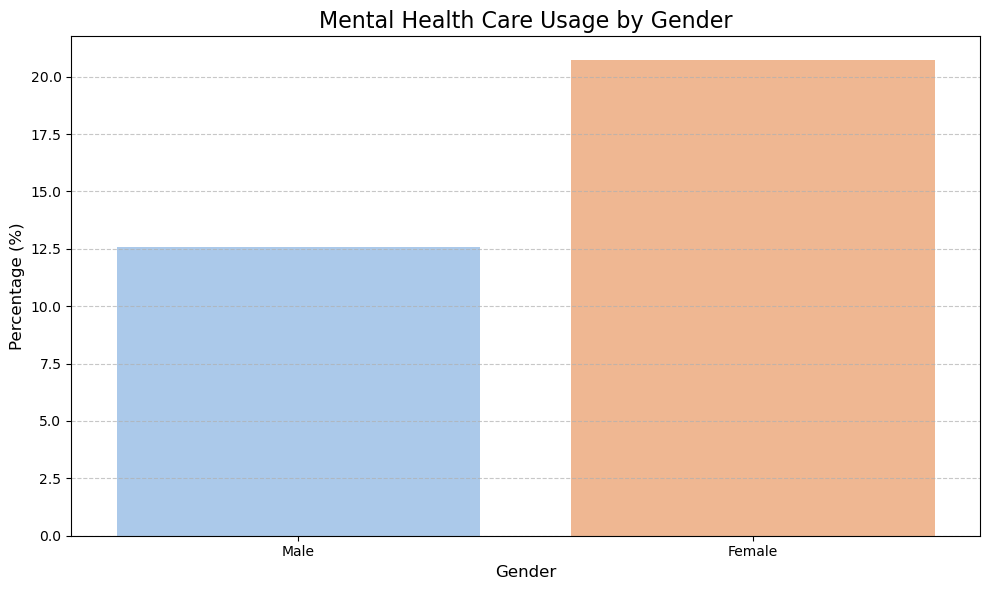

C:\Users\hp\AppData\Local\Temp\ipykernel_16128\96483569.py:83: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=age_data, x=age_group_col, y='Value', ci=None, palette='viridis')
C:\Users\hp\AppData\Local\Temp\ipykernel_16128\96483569.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_data, x=age_group_col, y='Value', ci=None, palette='viridis')


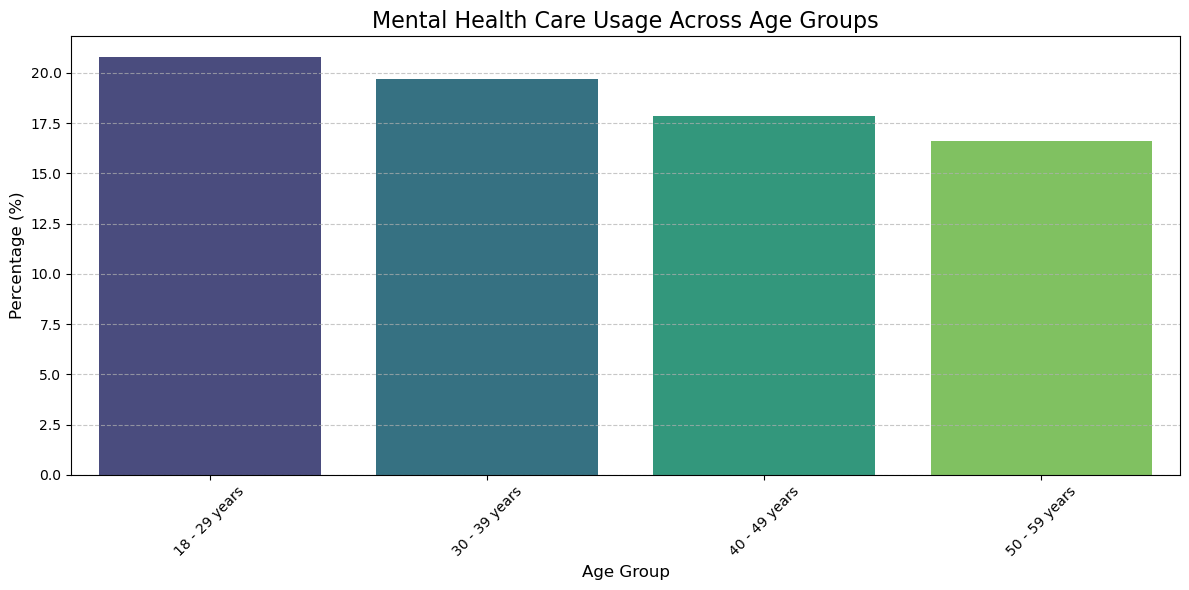

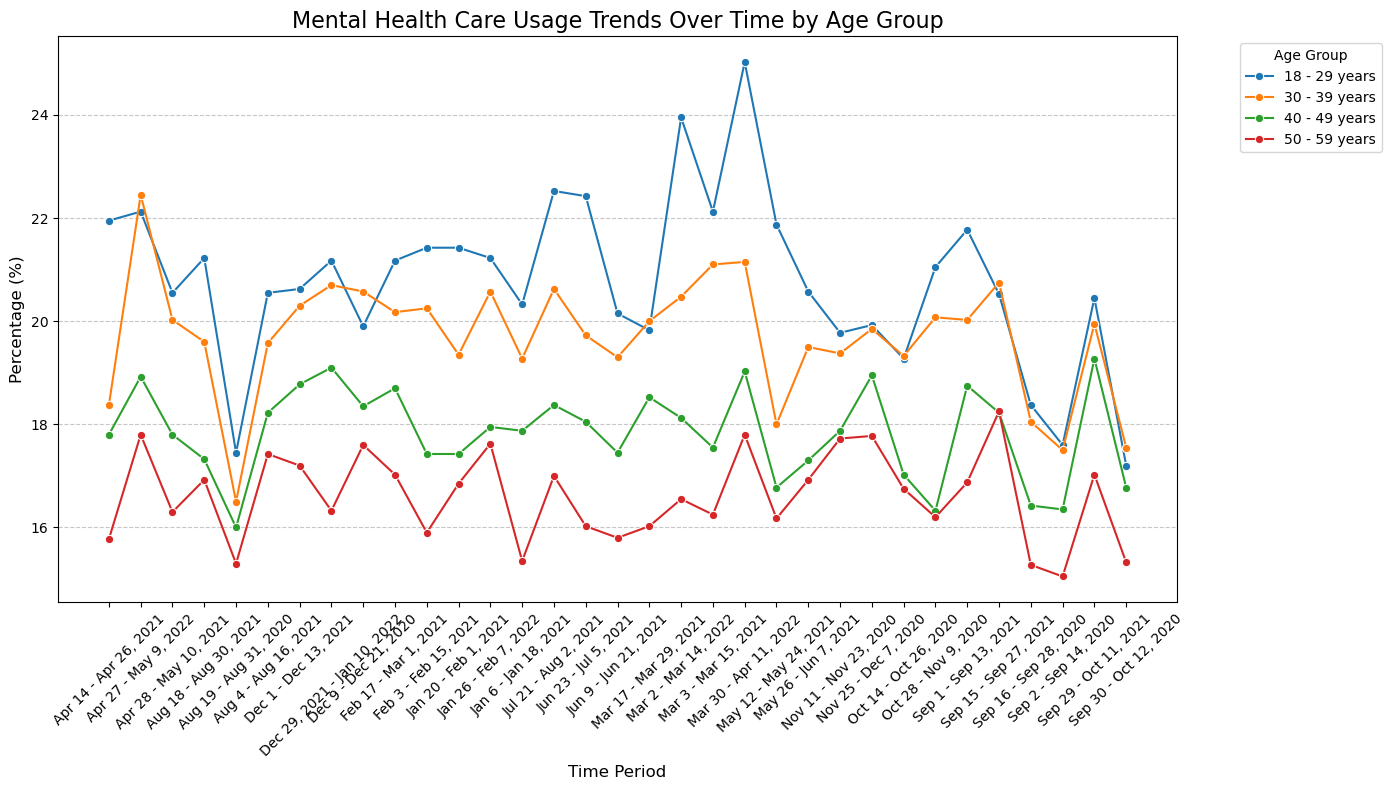

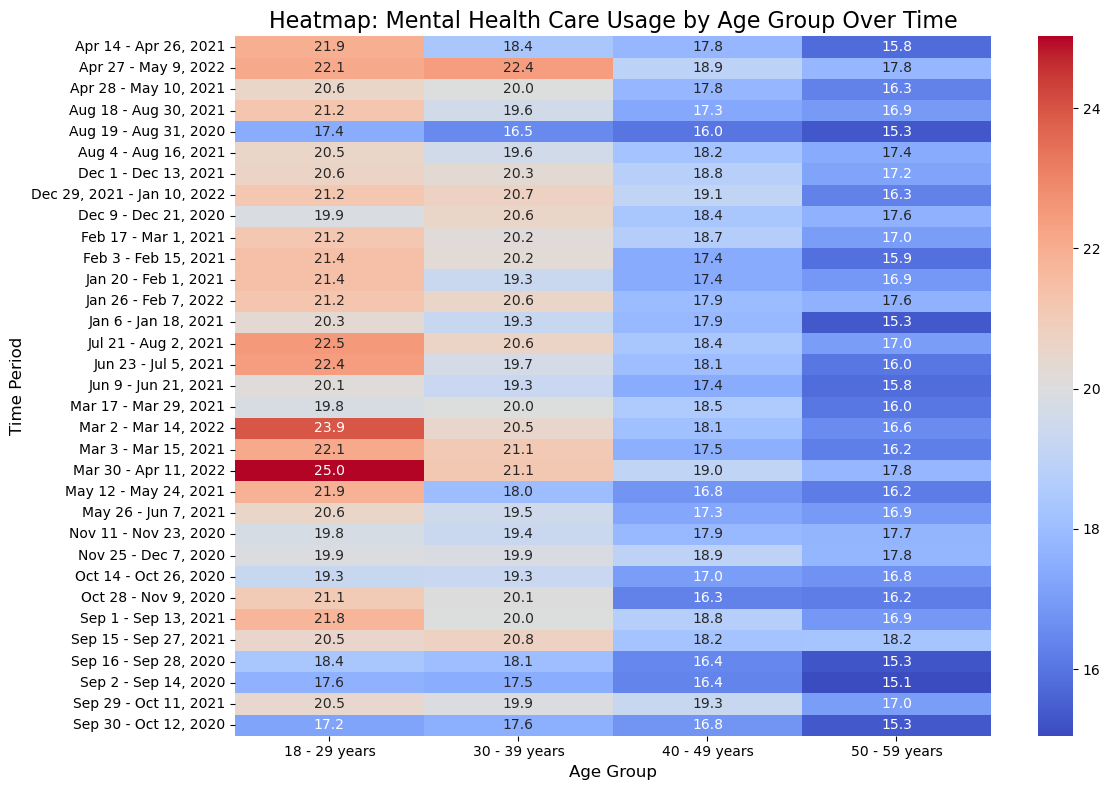

C:\Users\hp\AppData\Local\Temp\ipykernel_16128\96483569.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gender_data, x='Subgroup', y='Value', palette='pastel')


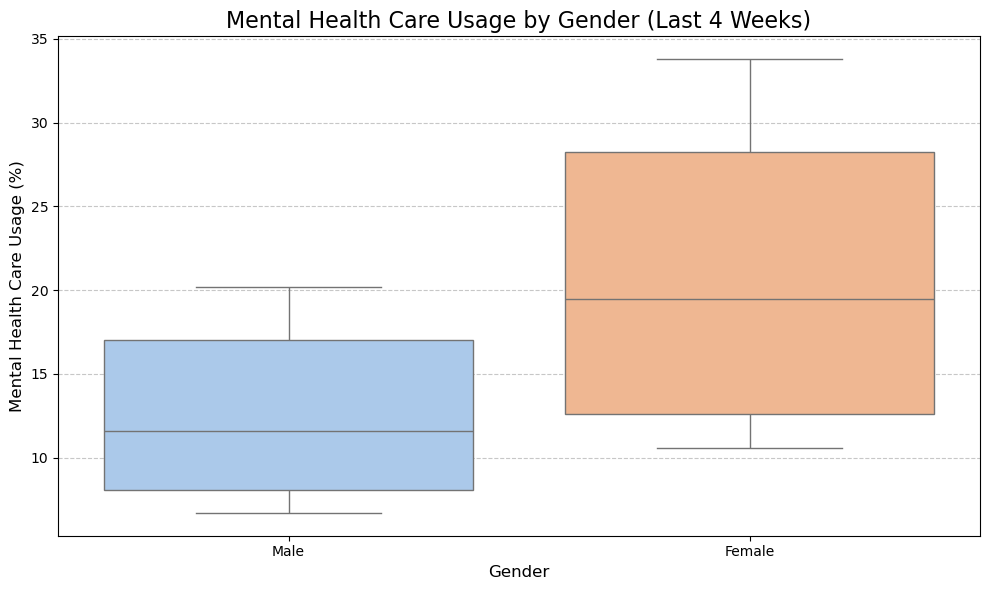

C:\Users\hp\AppData\Local\Temp\ipykernel_16128\96483569.py:138: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=age_data, x=age_group_col, y='Value', palette='muted', ci=None)
C:\Users\hp\AppData\Local\Temp\ipykernel_16128\96483569.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_data, x=age_group_col, y='Value', palette='muted', ci=None)


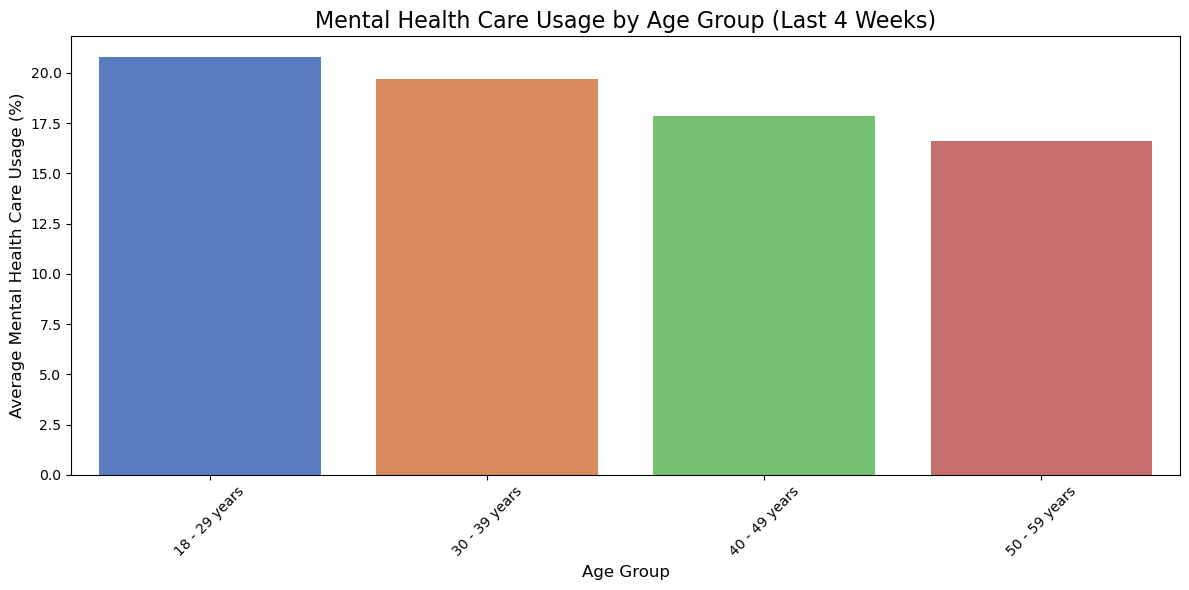

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the dataset
file_path = "Mental_Health_Care_in_the_Last_4_Weeks.csv"
data = pd.read_csv(file_path)

# Display the first few rows and basic info
print("First five rows of the dataset:")
print(data.head(3))
print("\nData Information:")
print(data.info())

# Check for missing values and duplicates
missing_values = data.isnull().sum()
print("\nMissing Values in the Dataset:")
print(missing_values)
duplicate_rows = data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_rows}")

# Drop duplicates
data = data.drop_duplicates()

# Summary statistics of numerical columns
print("\nSummary Statistics of Numerical Columns:")
print(data.describe())

# Drop rows with missing 'Value' if it exists
if 'Value' in data.columns:
    cleaned_data = data.dropna(subset=['Value'])
else:
    print("Column 'Value' not found. Proceeding without dropping rows.")
    cleaned_data = data

# Drop the 'Quartile Range' column if it exists
if 'Quartile Range' in cleaned_data.columns:
    cleaned_data = cleaned_data.drop(columns=['Quartile Range'])

# Convert date columns to datetime if they exist
if 'Time Period Start Date' in cleaned_data.columns:
    cleaned_data['Time Period Start Date'] = pd.to_datetime(
        cleaned_data['Time Period Start Date'], errors='coerce'
    )
if 'Time Period End Date' in cleaned_data.columns:
    cleaned_data['Time Period End Date'] = pd.to_datetime(
        cleaned_data['Time Period End Date'], errors='coerce'
    )

# Remove duplicates again
cleaned_data = cleaned_data.drop_duplicates()

# Summary of the cleaned data
print("\nCleaned Data Information:")
print(cleaned_data.info())

# Hypothesis 1: Gender-based analysis
gender_data = cleaned_data[
    (cleaned_data['Group'] == 'By Sex') & (cleaned_data['Value'].notnull())
]

# Visualization 1: Mental health care usage by gender
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_data, x='Subgroup', y='Value', ci=None, palette='pastel')
plt.title('Mental Health Care Usage by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Hypothesis 2: Age-based analysis
age_group_col = 'Subgroup'  # Define the column name for age groups
age_groups = ['18 - 29 years', '30 - 39 years', '40 - 49 years', '50 - 59 years', '60 years and above']

# Filter for age-specific data
age_data = cleaned_data[cleaned_data[age_group_col].isin(age_groups)]

# Visualization 2: Mental health care usage across age groups
plt.figure(figsize=(12, 6))
sns.barplot(data=age_data, x=age_group_col, y='Value', ci=None, palette='viridis')
plt.title('Mental Health Care Usage Across Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization 3: Trends over time by age group (Hypothesis 2 over time)
# Ensure only numeric columns are included in the aggregation
numeric_columns = age_data.select_dtypes(include='number').columns
age_time_data = age_data.groupby(['Time Period Label', 'Subgroup'], as_index=False)[numeric_columns].mean()

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=age_time_data,
    x='Time Period Label',
    y='Value',
    hue='Subgroup',
    marker='o',
    palette='tab10'
)
plt.title('Mental Health Care Usage Trends Over Time by Age Group', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Correlation Heatmap for Age Groups
age_pivot = age_data.pivot_table(values='Value', index='Time Period Label', columns='Subgroup', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(age_pivot, annot=True, fmt=".1f", cmap="coolwarm", cbar=True)
plt.title("Heatmap: Mental Health Care Usage by Age Group Over Time", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Time Period", fontsize=12)
plt.tight_layout()
plt.show()

### Hypothesis 1: Women vs. Men Mental Health Care Usage
plt.figure(figsize=(10, 6))
sns.boxplot(data=gender_data, x='Subgroup', y='Value', palette='pastel')
plt.title("Mental Health Care Usage by Gender (Last 4 Weeks)", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Mental Health Care Usage (%)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Hypothesis 2: Mental Health Care Usage by Age Group
plt.figure(figsize=(12, 6))
sns.barplot(data=age_data, x=age_group_col, y='Value', palette='muted', ci=None)
plt.title("Mental Health Care Usage by Age Group (Last 4 Weeks)", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Average Mental Health Care Usage (%)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
OBSERVATION :- HYPOTHESIS 1: Women are more likely to seek mental health care than men over the past month.
The plot suggests that women seek mental health support more than men, this suggests that women are highly likely at risk of mental illness.

In [ ]:
OBSERVATION :- HYPOTHESIS 2:Younger age groups are more likely to use mental health services than older populations.
The visualization shows that people in the age groups of 18-29 years have issues with balancing their mental health compared to the older generations.